# Various way of Stock Data Analysis

> In this post, we will taste various way of stock data analysis. This is the tutorial offered in Finance AI lecture from Chung-Ang University.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Machine_Learning]
- image: 

We will use [FinanceDataReader](https://financedata.github.io/FinanceDataReader/) package for crawling stock data. And it will compare with [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/#), which is widely used for remote data access.

## Packages

In [22]:
import FinanceDataReader as fdr 
import pandas_datareader as pdr
import math
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 10)

## Load the dataset

Here, we will show some trends of stock analysis, especially on KOSPI (Korea Composite Stock Price Index) from 2000-01-01 to today. Additionally, we will also try to find trend in other Stock index.

In [2]:
end = datetime.today()
start = datetime(2000,1,1)

kospi = pdr.DataReader('^KS11','yahoo',start,end) # KOSPI
ss_yh = pdr.DataReader('005930.KS','yahoo',start,end) # YAHOO: Samsung Electronics Co., Ltd. 
ss_f = fdr.DataReader('005930', start, end) # FDR: Samsung Electronics Co., Ltd. 
hm = pdr.DataReader('005380.KS','yahoo',start,end) # Hyundai Motor Company 

snp = pdr.DataReader('^GSPC','yahoo',start,end) #S&P500
nikkei = pdr.DataReader('^N225','yahoo',start,end) # Nikkei 225
euronext = pdr.DataReader('^N100','yahoo',start,end) # EURONEXT 100
vix = pdr.DataReader('^VIX','yahoo',start,end) # VIX

In [3]:
kospi.head()

High          Low         Open        Close    Volume  \
Date                                                                       
2000-01-04  1066.180054  1016.590027  1028.329956  1059.040039  195900.0   
2000-01-05  1026.520020   984.049988  1006.869995   986.309998  257700.0   
2000-01-06  1014.900024   953.500000  1013.950012   960.789978  203500.0   
2000-01-07   970.159973   930.840027   949.169983   948.650024  215700.0   
2000-01-10   994.940002   974.820007   979.669983   987.239990  240200.0   

              Adj Close  
Date                     
2000-01-04  1059.040039  
2000-01-05   986.309998  
2000-01-06   960.789978  
2000-01-07   948.650024  
2000-01-10   987.239990

In [4]:
ss_yh.head()

High     Low    Open   Close      Volume    Adj Close
Date                                                               
2000-01-04  6110.0  5660.0  6000.0  6110.0  74195000.0  4740.119629
2000-01-05  6060.0  5520.0  5800.0  5580.0  74680000.0  4328.947754
2000-01-06  5780.0  5580.0  5750.0  5620.0  54390000.0  4359.979492
2000-01-07  5670.0  5360.0  5560.0  5540.0  40305000.0  4297.916992
2000-01-10  5770.0  5580.0  5600.0  5770.0  46880000.0  4476.349121

In [5]:
ss_f.head()

Open  High   Low  Close   Volume    Change
Date                                                  
2000-01-04  6000  6110  5660   6110  1483967  0.148496
2000-01-05  5800  6060  5520   5580  1493604 -0.086743
2000-01-06  5750  5780  5580   5620  1087810  0.007168
2000-01-07  5560  5670  5360   5540   806195 -0.014235
2000-01-10  5600  5770  5580   5770   937615  0.041516

As you can see, the information contained each packages is different. `FinanceDataReader` shows the amount of volume and its daily changes. Unlike it, yahoo finance data shows the total volume in US dollars and Adjusted Close value. We will not cover the meaning of each column in details, but we use Close value for stock analysis.

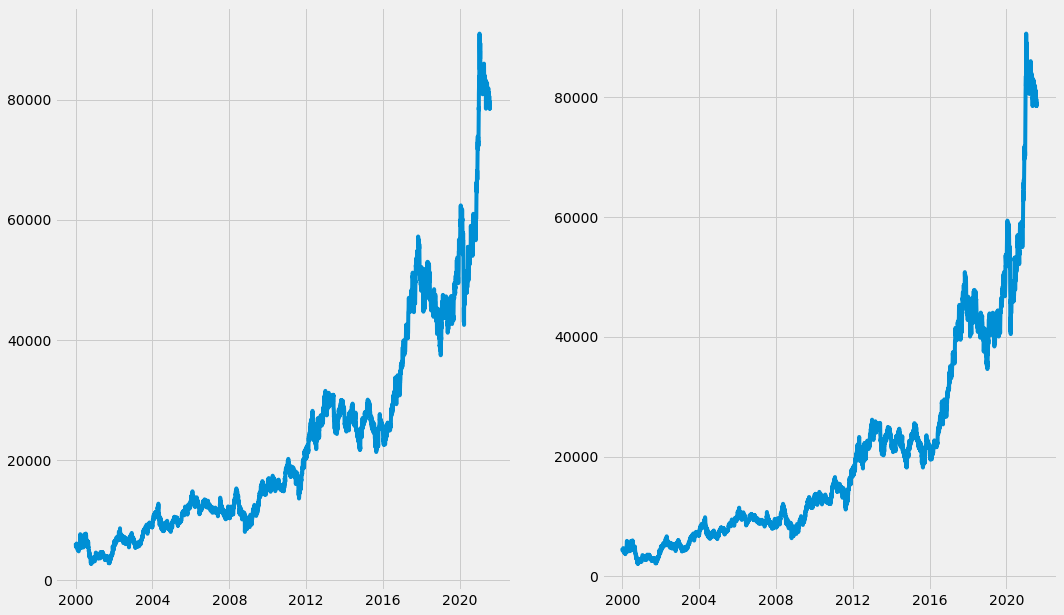

In [23]:
plt.subplot(1, 2, 1)
ss_yh_close = ss_yh[['Close']]
plt.plot(ss_yh_close)

plt.subplot(1, 2, 2)
ss_yh_aclose = ss_yh[['Adj Close']]
plt.plot(ss_yh_aclose)
plt.show()

In [9]:
ss = ss_yh

In [10]:
eqt = pd.DataFrame({
    'SP500': snp['Adj Close'],
    'KOSPI': kospi['Adj Close'],
    'ss': ss['Close'],
    'hm': hm['Adj Close'],
    'nikkei': nikkei['Adj Close'],
    'euronext': euronext['Adj Close'],
    'VIX': vix['Adj Close']
})

eqt = eqt.dropna()

In [11]:
eqt.head()

SP500        KOSPI      ss            hm        nikkei  \
Date                                                                       
2000-01-04  1399.420044  1059.040039  6110.0  13260.293945  19002.859375   
2000-01-05  1402.109985   986.309998  5580.0  13324.354492  18542.550781   
2000-01-06  1403.449951   960.789978  5620.0  12619.700195  18168.269531   
2000-01-07  1441.469971   948.650024  5540.0  13004.054688  18193.410156   
2000-01-11  1438.560059   981.330017  5770.0  12811.878906  18850.919922   

              euronext        VIX  
Date                               
2000-01-04  955.969971  27.010000  
2000-01-05  930.260010  26.410000  
2000-01-06  922.460022  25.730000  
2000-01-07  943.880005  21.719999  
2000-01-11  954.059998  22.500000

We can measure the earning rate for each date.

In [12]:
rtn = (np.log(eqt) - np.log(eqt.shift(1))) * 100
rtn.columns = ['r_snp', 'r_ko', 'r_ss', 'r_hm', 'r_nk', 'r_ux', 'r_vx']

In [13]:
rtn = rtn.dropna()
rtn.head()

r_snp      r_ko      r_ss      r_hm      r_nk      r_ux  \
Date                                                                     
2000-01-05  0.192034 -7.114745 -9.073800  0.481937 -2.452133 -2.726237   
2000-01-06  0.095522 -2.621486  0.714289 -5.433442 -2.039149 -0.842009   
2000-01-07  2.672995 -1.271589 -1.433716  3.000211  0.138281  2.295501   
2000-01-11 -0.202075  3.386886  4.067758 -1.488843  3.550227  1.072752   
2000-01-12 -0.439602 -2.718699 -0.870328 -2.788524 -0.924641 -0.760698   

                 r_vx  
Date                   
2000-01-05  -2.246446  
2000-01-06  -2.608511  
2000-01-07 -16.942415  
2000-01-11   3.528185  
2000-01-12   1.499808

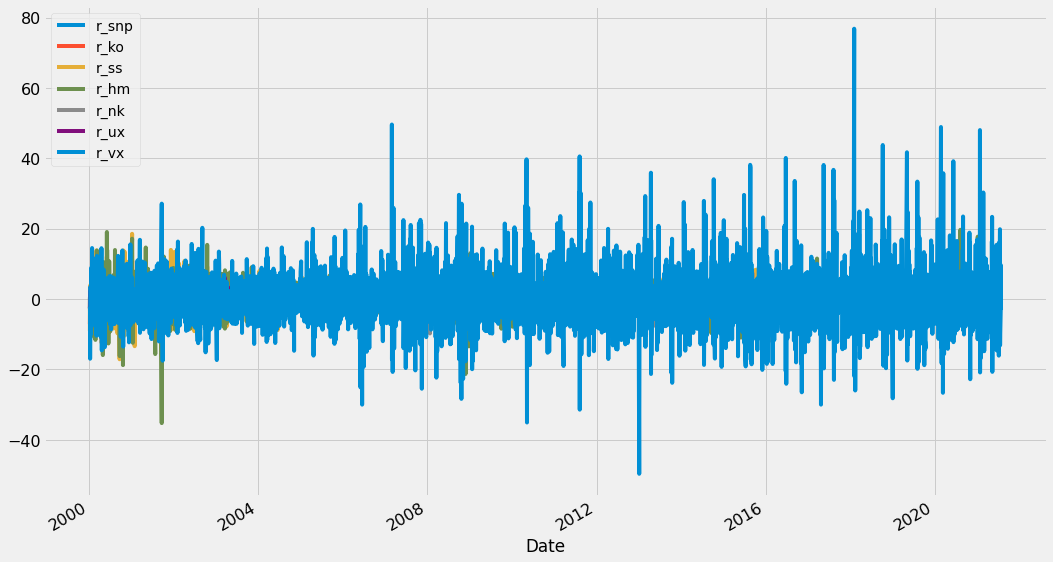

In [24]:
rtn.plot(fontsize=16)
plt.show()

## Stylized facts of stock returns

1. volatility clustering
2. leverage effect: negative skewness, asymmetric
3. Fat tail: leptokurtic     

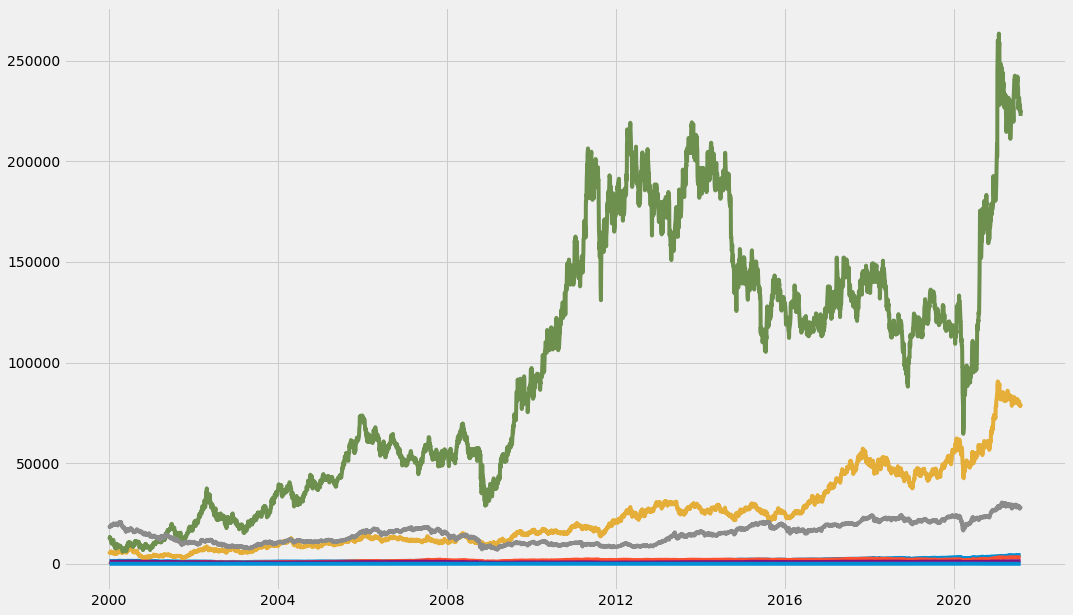

In [25]:
plt.plot(eqt)
plt.show()

In [17]:
pr = pd.merge(eqt,rtn,left_index=True, right_index=True, how='inner')
pr.head()

SP500       KOSPI      ss            hm        nikkei  \
Date                                                                      
2000-01-05  1402.109985  986.309998  5580.0  13324.354492  18542.550781   
2000-01-06  1403.449951  960.789978  5620.0  12619.700195  18168.269531   
2000-01-07  1441.469971  948.650024  5540.0  13004.054688  18193.410156   
2000-01-11  1438.560059  981.330017  5770.0  12811.878906  18850.919922   
2000-01-12  1432.250000  955.010010  5720.0  12459.551758  18677.419922   

              euronext        VIX     r_snp      r_ko      r_ss      r_hm  \
Date                                                                        
2000-01-05  930.260010  26.410000  0.192034 -7.114745 -9.073800  0.481937   
2000-01-06  922.460022  25.730000  0.095522 -2.621486  0.714289 -5.433442   
2000-01-07  943.880005  21.719999  2.672995 -1.271589 -1.433716  3.000211   
2000-01-11  954.059998  22.500000 -0.202075  3.386886  4.067758 -1.488843   
2000-01-12  946.830017  22.840000 -0.439602 -2.718699 -0.870328 -2.788524   

                r_nk      r_ux       r_vx  
Date                                       
2000-01-05 -2.452133 -2.726237  -2.246446  
2000-01-06 -2.039149 -0.842009  -2.608511  
2000-01-07  0.138281  2.295501 -16.942415  
2000-01-11  3.550227  1.072752   3.528185  
2000-01-12 -0.924641 -0.760698   1.499808

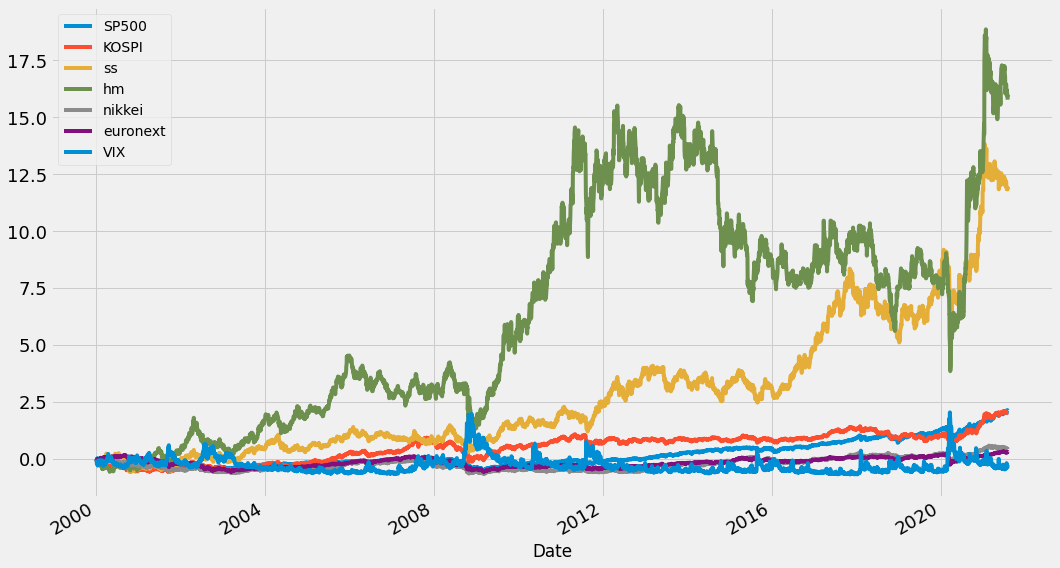

In [26]:
pr_0 = eqt / eqt.iloc[0] - 1.0
pr_0.plot(fontsize=18)
plt.show()

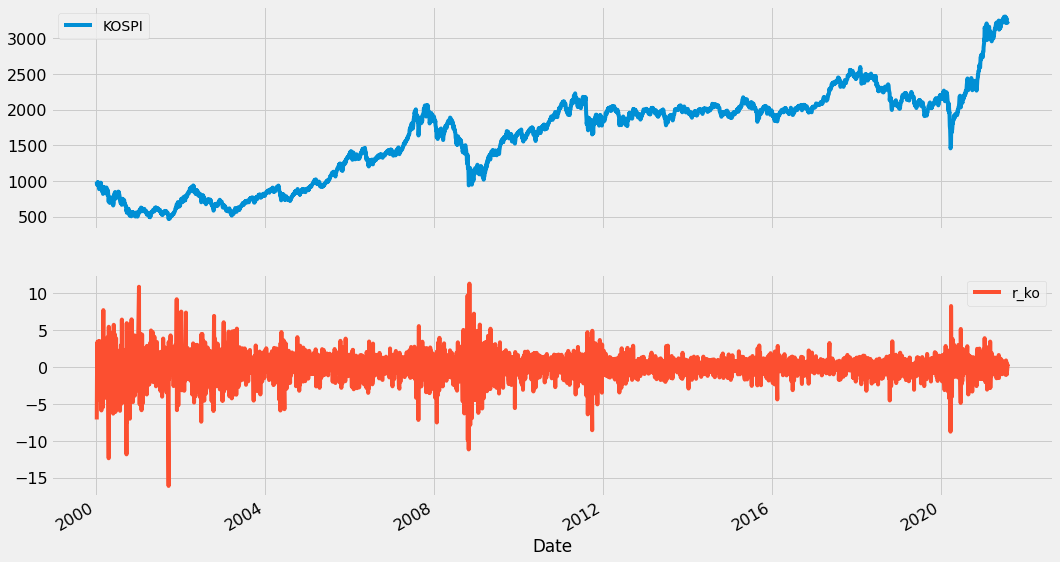

In [27]:
pr[['KOSPI', 'r_ko']].plot(subplots=True, fontsize=16)
plt.show()

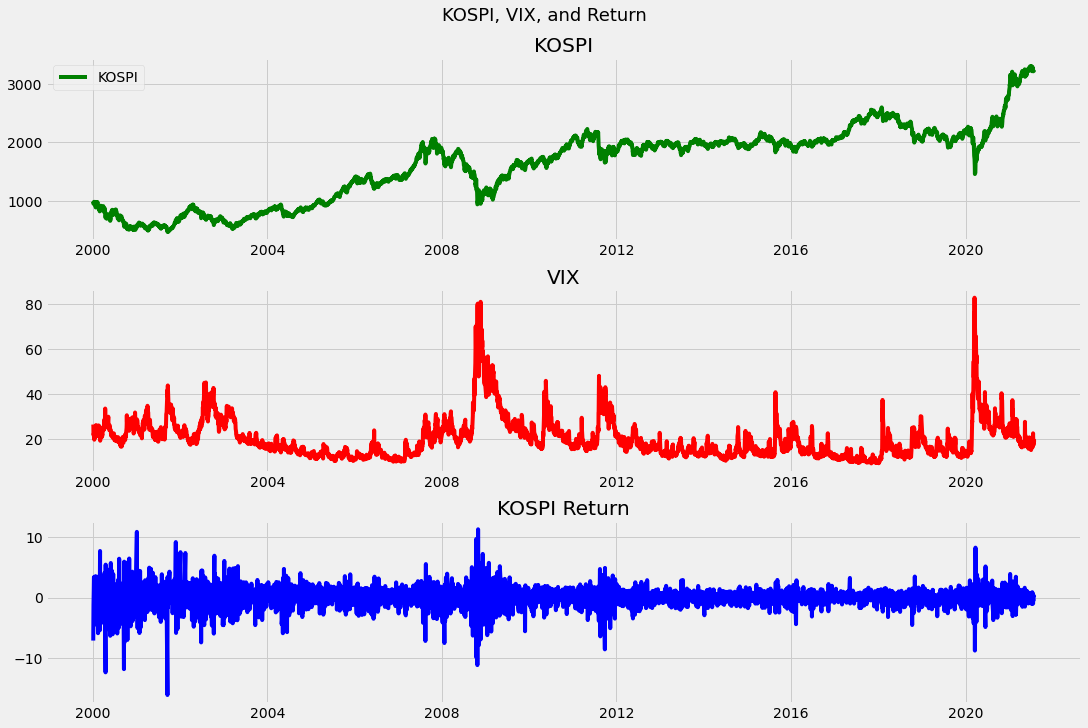

In [29]:
fig, axs = plt.subplots(3, 1, figsize=(15,10), constrained_layout=True)
fig.suptitle('KOSPI, VIX, and Return', fontsize=18)

axs[0].plot(pr.index, pr['KOSPI'], 'g-', label='KOSPI')
axs[0].set_title('KOSPI')
axs[0].legend(['KOSPI'])

axs[1].plot(pr.index, pr['VIX'], 'r-')
axs[1].set_title('VIX')

axs[2].plot(pr.index, pr['r_ko'], 'b-')
axs[2].set_title('KOSPI Return')
plt.show()

In [30]:
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

               SP500          KOSPI            ss            hm        nikkei  \
count    4847.000000    4847.000000  4.847000e+03  4.847000e+03  4.847000e+03   
mean     1714.702890    1625.298570  2.338999e+04  9.874198e+04  1.500285e+04   
std       771.741421     633.105784  1.820683e+04  6.346898e+04  5.175227e+03   
min       676.530029     468.760010  2.730000e+03  6.021583e+03  7.054980e+03   
25%      1168.320007     993.890015  1.018000e+04  4.113560e+04  1.043476e+04   
50%      1397.839966    1843.469971  1.618000e+04  1.044991e+05  1.444014e+04   
75%      2097.140015    2036.619995  2.966000e+04  1.441255e+05  1.888506e+04   
max      4422.299805    3305.209961  9.060000e+04  2.634025e+05  3.046775e+04   
var    595584.820262  400822.933697  3.314887e+08  4.028312e+09  2.678298e+07   
skew        1.267734      -0.111666  1.322663e+00  2.732755e-01  6.322768e-01   
kurt        0.984148      -0.616686  1.375275e+00 -1.078980e+00 -3.258620e-01   

           euronext        

In [31]:
df=rtn
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

             r_snp         r_ko         r_ss         r_hm         r_nk  \
count  4847.000000  4847.000000  4847.000000  4847.000000  4847.000000   
mean      0.023615     0.023050     0.052858     0.058183     0.007686   
std       1.310833     1.575009     2.386239     2.853645     1.559326   
min     -12.765220   -16.115370   -17.092181   -35.231735   -12.111020   
25%      -0.484311    -0.604459    -1.153290    -1.332949    -0.742387   
50%       0.069295     0.078362     0.000000     0.000000     0.042488   
75%       0.606295     0.763176     1.260807     1.414297     0.840065   
max      10.423562    11.284352    18.550121    19.695317    13.234592   
var       1.718284     2.480653     5.694136     8.143289     2.431496   
skew     -0.455331    -0.604848     0.055846    -0.335556    -0.452340   
kurt     10.341111     8.938235     5.619281    10.457945     6.617724   

              r_ux         r_vx  
count  4847.000000  4847.000000  
mean      0.005973    -0.007476  
std      

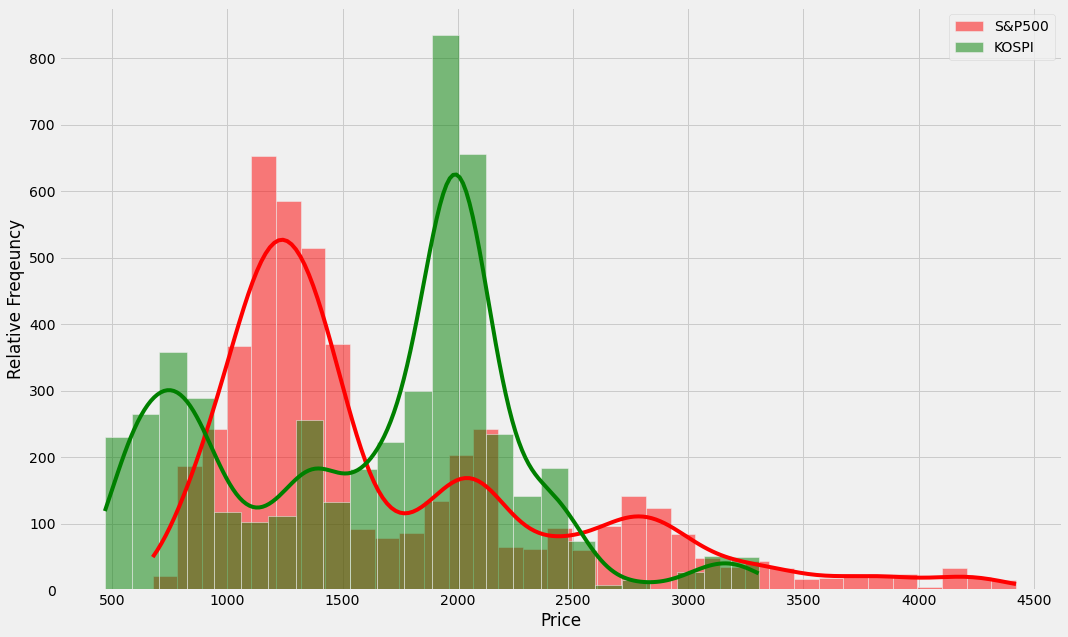

In [47]:
sns.histplot(pr['SP500'],  label='S&P500', color='red', kde=True) 
sns.histplot(pr['KOSPI'],  label='KOSPI', color='g', kde=True)
plt.xlabel('Price')
plt.ylabel('Relative Freqeuncy')  
plt.legend()
plt.show()

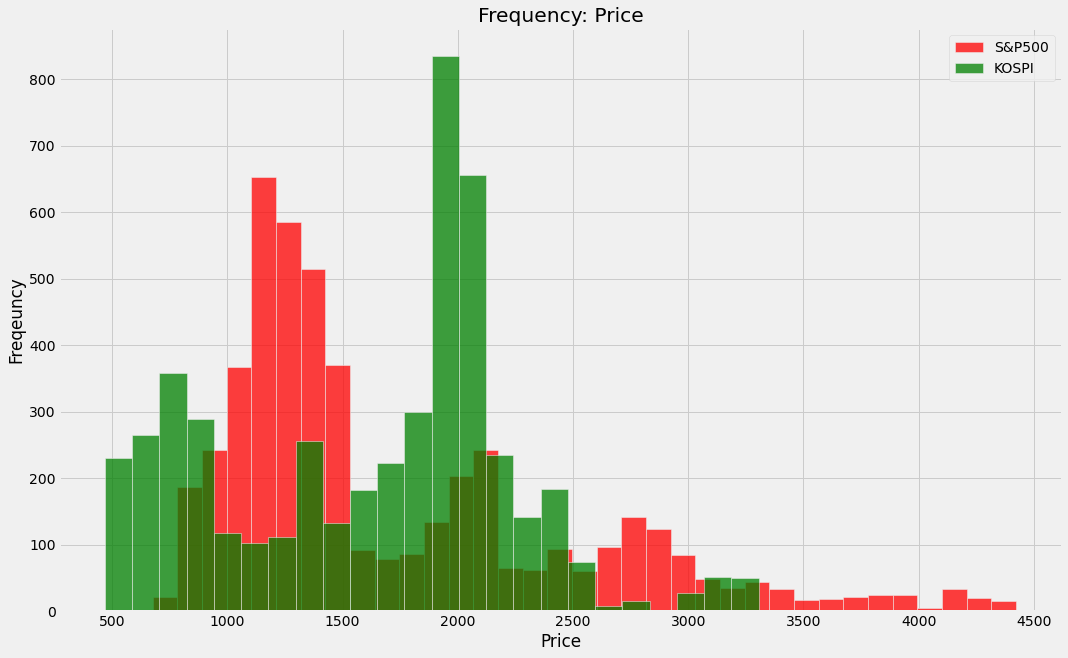

In [48]:
sns.histplot(pr['SP500'], kde = False, label='S&P500', color='r')
sns.histplot(pr['KOSPI'], kde = False, label='KOSPI', color='g')
# Plot formatting
plt.title('Frequency: Price')
plt.xlabel('Price')
plt.ylabel('Freqeuncy')  
plt.legend()
plt.show()

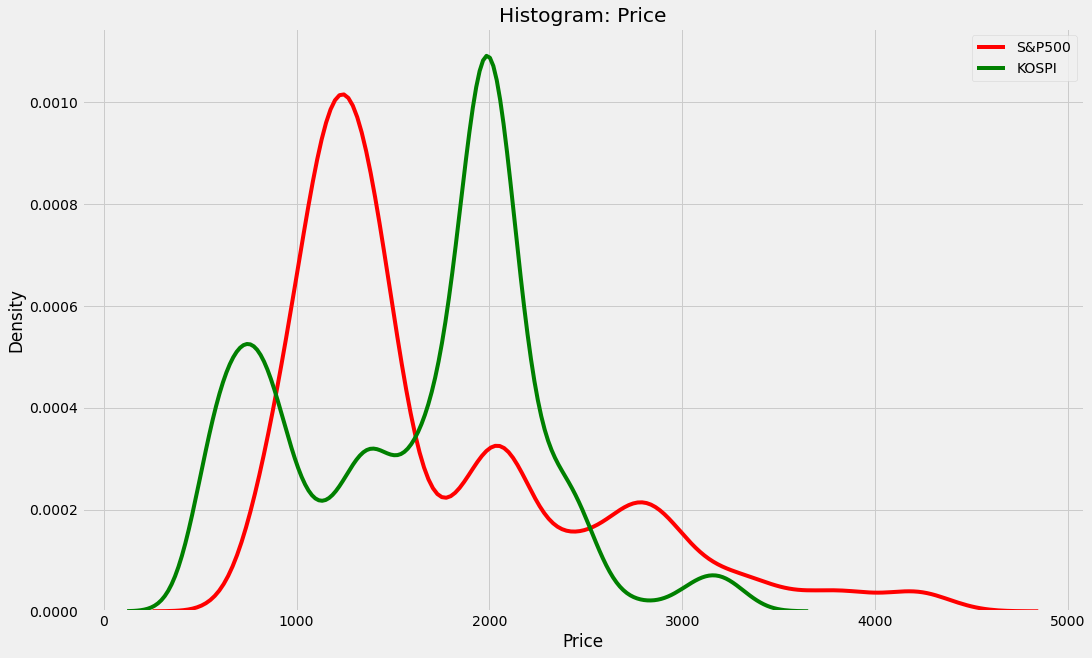

In [49]:
sns.kdeplot(pr['SP500'], label='S&P500', color='r')
sns.kdeplot(pr['KOSPI'], label='KOSPI', color='g')
# Plot formatting
plt.title('Histogram: Price')
plt.xlabel('Price')
plt.ylabel('Density')  
plt.legend()
plt.show()

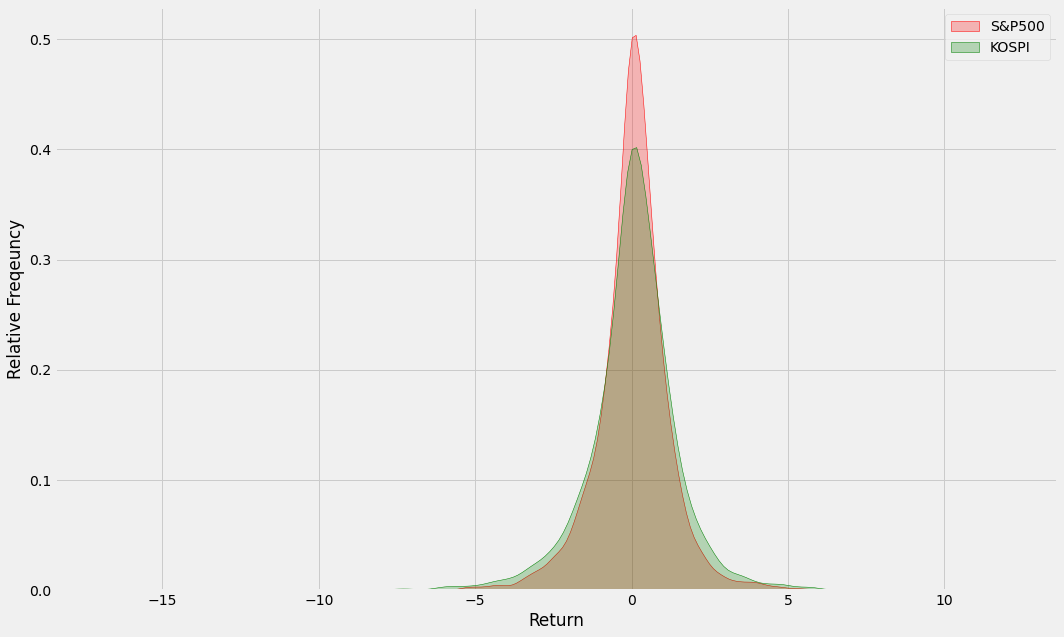

In [54]:
sns.kdeplot(pr['r_snp'],  label='S&P500', color='r', fill=True) 
sns.kdeplot(pr['r_ko'],  label='KOSPI', color='g', fill=True)
plt.xlabel('Return')
plt.ylabel('Relative Freqeuncy')  
plt.legend()
plt.show()

In [55]:
pr.corr()

SP500     KOSPI        ss        hm    nikkei  euronext  \
SP500     1.000000  0.773194  0.948351  0.572419  0.914308  0.775127   
KOSPI     0.773194  1.000000  0.851368  0.863015  0.633964  0.502768   
ss        0.948351  0.851368  1.000000  0.703395  0.794674  0.602461   
hm        0.572419  0.863015  0.703395  1.000000  0.344871  0.210835   
nikkei    0.914308  0.633964  0.794674  0.344871  1.000000  0.911428   
euronext  0.775127  0.502768  0.602461  0.210835  0.911428  1.000000   
VIX      -0.233301 -0.266702 -0.189310 -0.267898 -0.301109 -0.352069   
r_snp     0.033995  0.022287  0.025967  0.025785  0.010383  0.015977   
r_ko      0.012949  0.022540  0.019295  0.016402  0.008855  0.013475   
r_ss      0.006140  0.012282  0.016362  0.009795 -0.002207  0.000022   
r_hm     -0.002699 -0.001415  0.000749  0.007363 -0.008432 -0.001010   
r_nk      0.021633  0.030363  0.028307  0.030096  0.027856  0.016654   
r_ux      0.025685  0.017198  0.019633  0.019985  0.016340  0.034294   
r_vx     -0.002126  0.009997  0.005036  0.004058  0.018038  0.007260   

               VIX     r_snp      r_ko      r_ss      r_hm      r_nk  \
SP500    -0.233301  0.033995  0.012949  0.006140 -0.002699  0.021633   
KOSPI    -0.266702  0.022287  0.022540  0.012282 -0.001415  0.030363   
ss       -0.189310  0.025967  0.019295  0.016362  0.000749  0.028307   
hm       -0.267898  0.025785  0.016402  0.009795  0.007363  0.030096   
nikkei   -0.301109  0.010383  0.008855 -0.002207 -0.008432  0.027856   
euronext -0.352069  0.015977  0.013475  0.000022 -0.001010  0.016654   
VIX       1.000000 -0.145680 -0.096947 -0.047963 -0.047059 -0.120823   
r_snp    -0.145680  1.000000  0.234346  0.158144  0.128547  0.204297   
r_ko     -0.096947  0.234346  1.000000  0.764745  0.627848  0.608077   
r_ss     -0.047963  0.158144  0.764745  1.000000  0.459261  0.452301   
r_hm     -0.047059  0.128547  0.627848  0.459261  1.000000  0.327791   
r_nk     -0.120823  0.204297  0.608077  0.452301  0.327791  1.000000   
r_ux     -0.137821  0.609866  0.375496  0.267829  0.198385  0.403052   
r_vx      0.097920 -0.724445 -0.161164 -0.100367 -0.076523 -0.153811   

              r_ux      r_vx  
SP500     0.025685 -0.002126  
KOSPI     0.017198  0.009997  
ss        0.019633  0.005036  
hm        0.019985  0.004058  
nikkei    0.016340  0.018038  
euronext  0.034294  0.007260  
VIX      -0.137821  0.097920  
r_snp     0.609866 -0.724445  
r_ko      0.375496 -0.161164  
r_ss      0.267829 -0.100367  
r_hm      0.198385 -0.076523  
r_nk      0.403052 -0.153811  
r_ux      1.000000 -0.477924  
r_vx     -0.477924  1.000000

In [56]:
rtn.corr()

r_snp      r_ko      r_ss      r_hm      r_nk      r_ux      r_vx
r_snp  1.000000  0.234346  0.158144  0.128547  0.204297  0.609866 -0.724445
r_ko   0.234346  1.000000  0.764745  0.627848  0.608077  0.375496 -0.161164
r_ss   0.158144  0.764745  1.000000  0.459261  0.452301  0.267829 -0.100367
r_hm   0.128547  0.627848  0.459261  1.000000  0.327791  0.198385 -0.076523
r_nk   0.204297  0.608077  0.452301  0.327791  1.000000  0.403052 -0.153811
r_ux   0.609866  0.375496  0.267829  0.198385  0.403052  1.000000 -0.477924
r_vx  -0.724445 -0.161164 -0.100367 -0.076523 -0.153811 -0.477924  1.000000

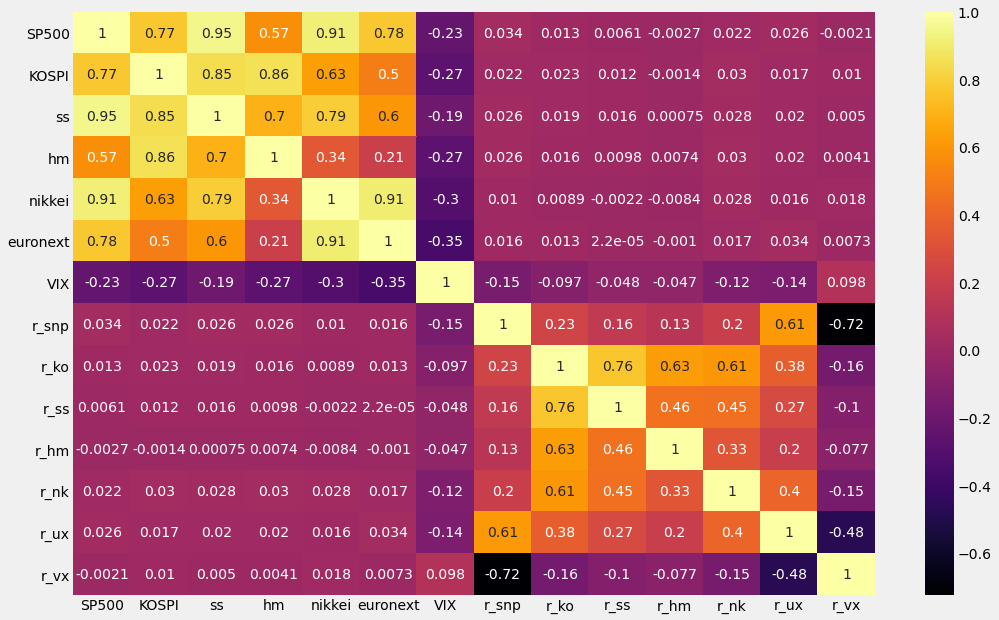

In [57]:
sns.heatmap(pr.corr(), annot=True, cmap='inferno')
plt.show()

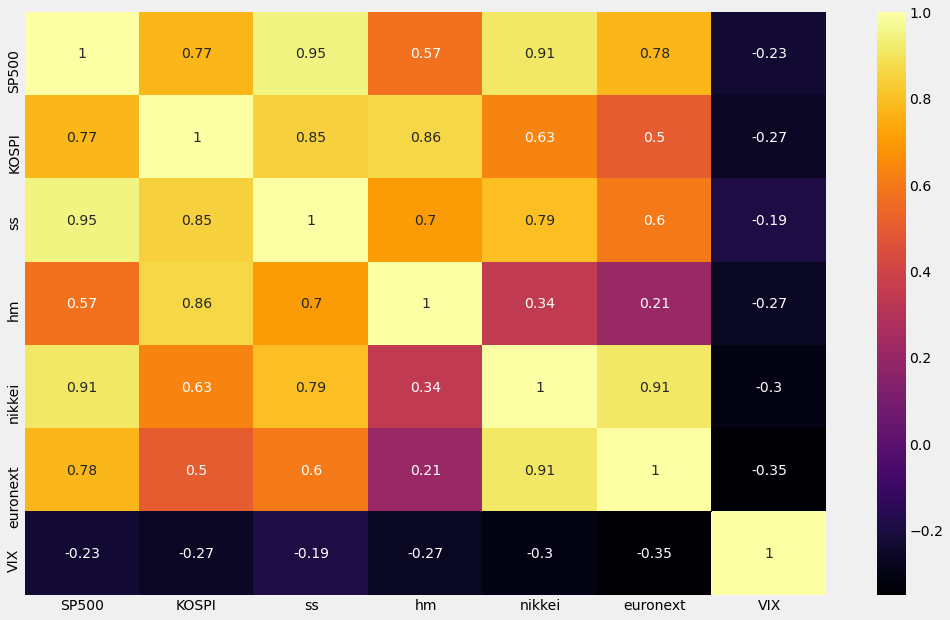

In [58]:
sns.heatmap(eqt.corr(), annot=True, cmap="inferno")
plt.show()

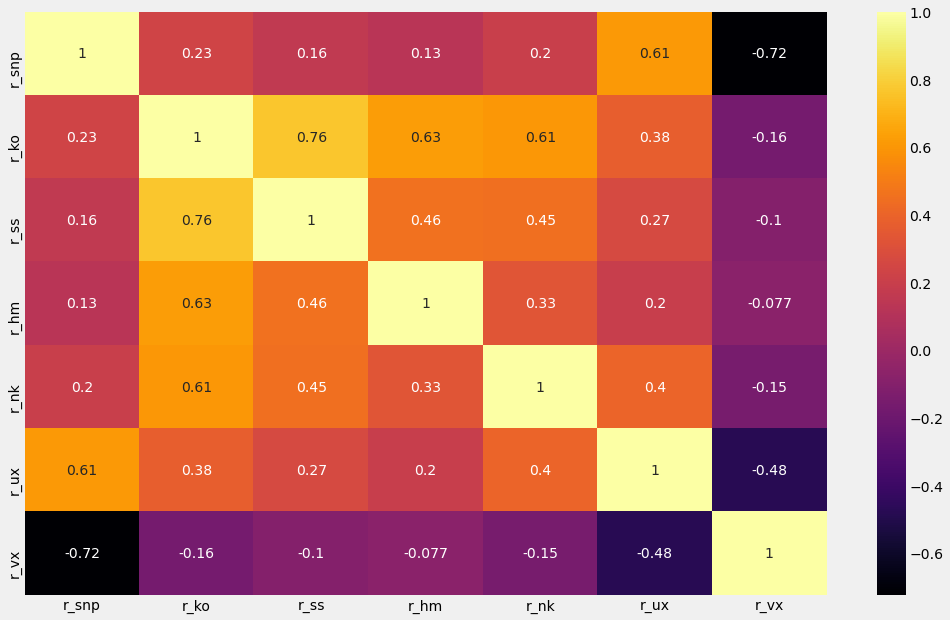

In [59]:
sns.heatmap(rtn.corr(), annot=True, cmap="inferno")
plt.show()

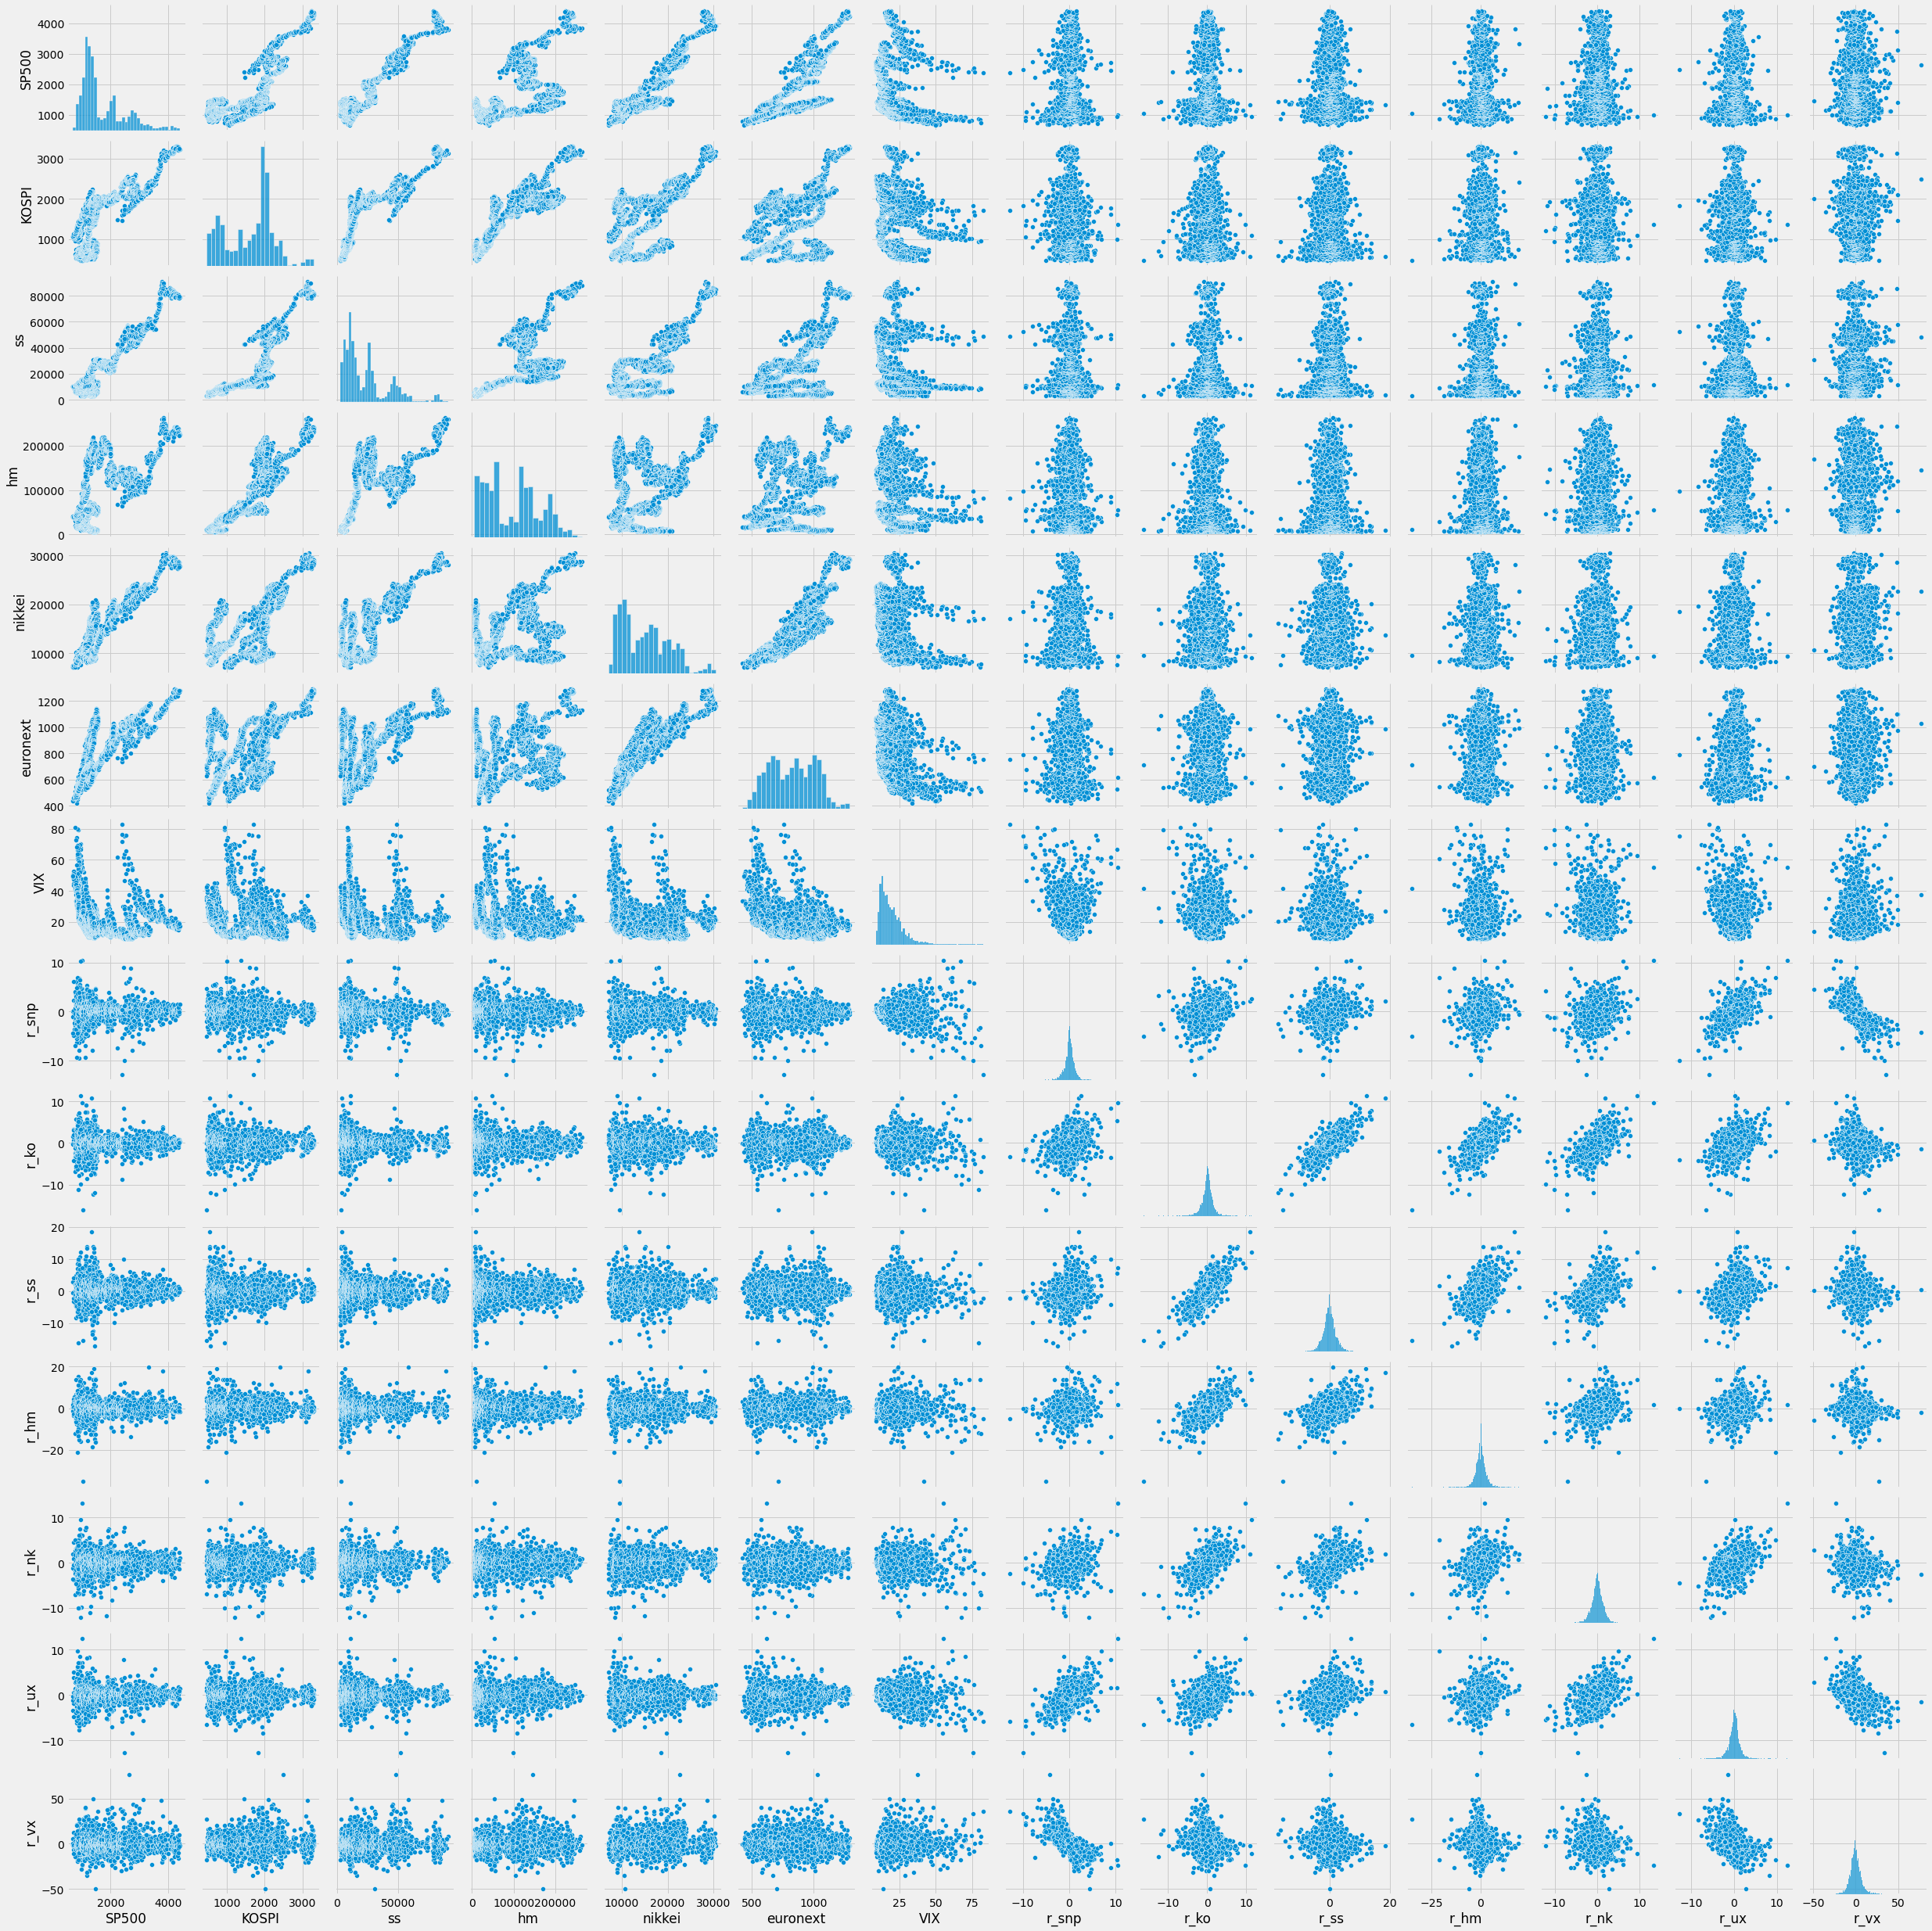

In [60]:
sns.pairplot(pr)
plt.show()

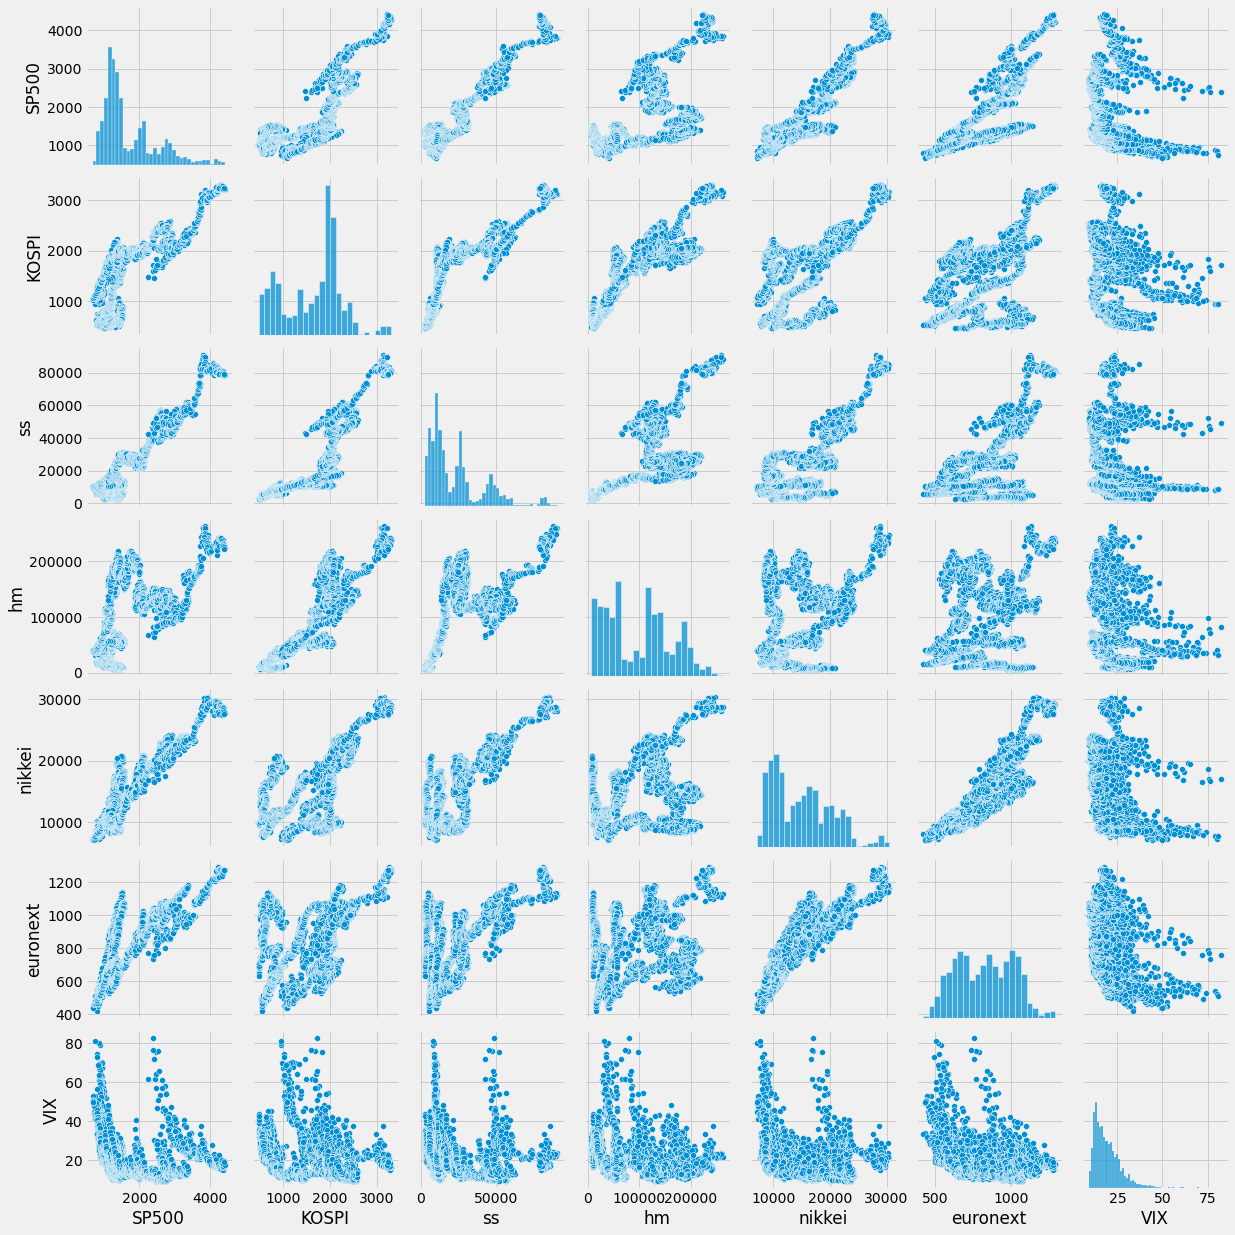

In [61]:
sns.pairplot(eqt)
plt.show()

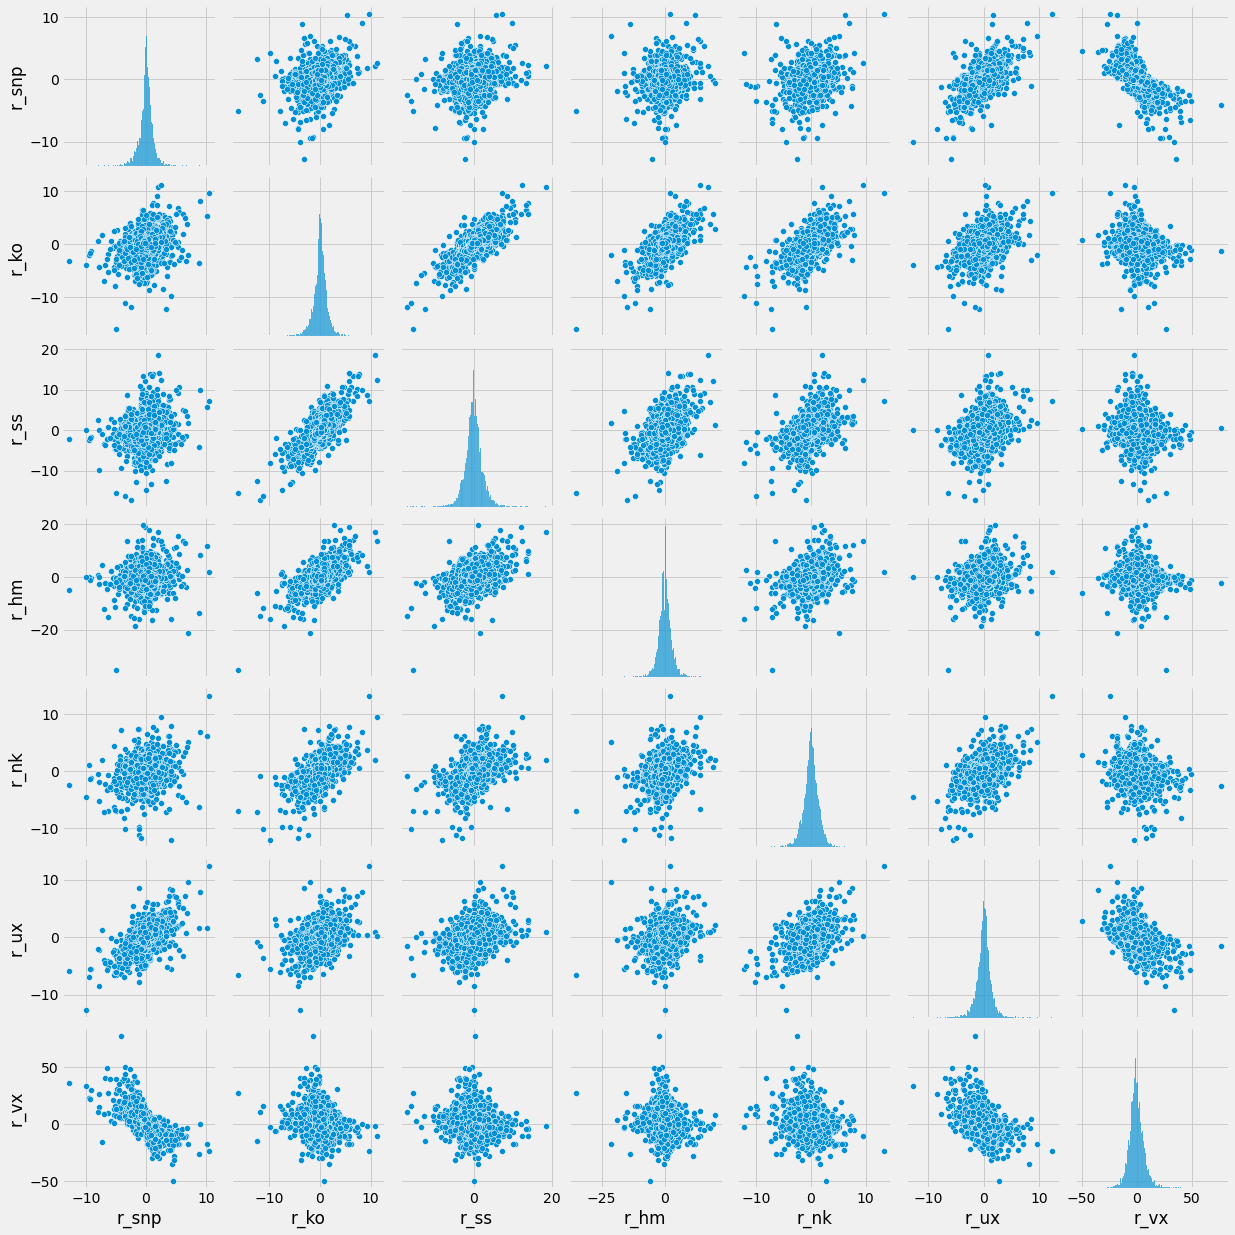

In [62]:
sns.pairplot(rtn)
plt.show()